In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
#SOLVE WITH SOLVE_IVP AND NUMPY

In [4]:
param = [[1.0,-4.0],[4.0, -7.0]]

In [59]:
def slope(t,y):
    #gt = np.array([6*t,-10*t+4])
    #return [-3/2*y[0]+1/2*y[1],1*y[0]-1*y[1]]
    return(np.matmul(param,[y[0]**3,y[1]**3]))
    #return(np.matmul([y[0]**3,y[1]**3],param))
    #return(3*np.power(t,2)*y)
    #return((y-1)*(y+1)*(y-3))
    #return(np.matmul(param,y))
    #return [-0.1*y[0]**3-2*y[1]**3,2*y[0]**3-0.1*y[1]**3]
    #return ((1/10)*(1-y/0.1)*(1-y/0.5)*(1-y/0.7))

In [6]:
#FUNCTIONS GENERAL

In [7]:
def random():
    rand = 0
    while abs(rand) < 0.5 or abs(rand) > 3:
        rand = np.random.normal(0, 1, 1)[0]
    return rand

In [8]:
#FUNCTIONS NUMPY

In [9]:
def getSlopes(x1,x2):
    dim =  x1.shape[0] * x2.shape[0]
    slopeList = np.zeros((dim,2))
    i = 0
    for l in x1:
        for k in x2:
            #print(slope([],[l,k]))
            slopeList[i] = slope([],[l,k])
            i += 1
    return slopeList

In [10]:
def drawDFN(ySpace,h):
    for l in ySpace:
        for k in ySpace:
            #direction i and j + Magnitude of <i,j>
            #print(slope([],[l,k]))
            i = slope(t,[l,k])[0]
            j = slope(t,[l,k])[1]  
            magnitude = np.sqrt(i**2+j**2)

            #normalize and scale by h
            i = h*i/magnitude
            j = h*j/magnitude

            current_domain = np.linspace(l-(i/2), l+(i/2), 2) #the end points of the small intervals
            current_range = np.linspace(k-(j/2), k+(j/2), 2)

            plt.plot(current_domain, current_range, lw=0.2, color='b')
            plt.arrow(current_domain[0],current_range[0], i, j, color='blue', lw=0.5, length_includes_head=True, head_length=.06, head_width=.06)

In [11]:
def linear(x1, y1, slope, domain):
    z = (slope)*(x1-domain)-y1
    return z

In [12]:
def drawDFN1(yspace,h):
    for j in yspace:
        for k in yspace:
            local_slope = slope(j, k)
            dt = (np.sqrt(h**2/((local_slope**2)+1))) #adjusts dt in proportion to constant h
            arrow_dt = (dt)+0.01
            arrow_dy = local_slope*arrow_dt
            current_domain = np.linspace(j-(dt/2), j+(dt/2), 2) #the end points of the small intervals

            plt.plot(current_domain,linear(j, k, local_slope, current_domain), color='purple')

In [13]:
#GRAPHING

In [57]:
Y = np.linspace(-4.0,4.0,30)
X = np.linspace(-2.0,2.0,200)
h = 0.15 # length of vectors

In [58]:
sl = getSlopes(X,X)

In [53]:
t = np.linspace(0.0, 100.0, 10500)
ts = (0,100)

In [54]:
# ANALYTIC SOLUTION

In [55]:
x1 = -2*t-4/7+(6/35)*np.exp(7*t)-(-2/5)*np.exp(2*t)
x2 = 6*t+10/7+(6/35)*np.exp(7*t)+4*(-2/5)*np.exp(2*t)

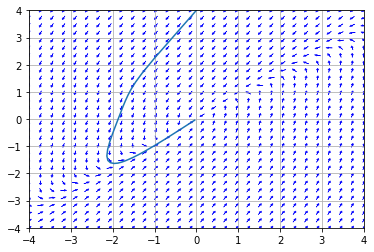

In [60]:
for i in range(0,1):
    y0 = [0,4]
    sol45 = solve_ivp(slope, ts, y0, t_eval=t, method='RK45')
    plt.plot(sol45.y[0],sol45.y[1])

# plt.plot(x1,x2)
# draw for system
drawDFN(Y,h)
# draw for automatic
# drawDFN1(Y,h)

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.show()